### Manual Fitting of a dampened oscillator

Use the sliders to minimise residuum and the chi-square value. Can you get it below 100, or even below 42? You can change each parameter by sliding the middle point with your mouse or finger, or click on a slider and use the cursor keys to change the value (recommended to finetune!). 

**Note down your best fit** and determine which parameter change the chi2 value most dramatically.

In [1]:
# Get functions, enable widget mode
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import ipywidgets as ipyw
from matplotlib.ticker import AutoMinorLocator
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
#Load Data
data = pd.read_csv('datalog.txt', header = None, skiprows=3)
#data.head()

In [3]:
#Set Initial COnditions/Parameters
t = np.arange(0, 50, 0.1)         # time axis, not in file, read every 100msec, 500 points
a0 = 300                          # initial guess amplitude
f0 = 0.55                          # initial guess frequency
g0 = 0.07                         # initial guess damping
p0 = np.pi                        # initial guess phase
o0 = 350                          # initial guess offset
s = a0*np.sin(2*np.pi*f0*t+p0)*np.exp(-g0*t)+o0      # generate initial sine wave
dd = data[0].values.tolist()

In [4]:
#Define all "sliders"
sfreq = ipyw.widgets.FloatSlider(
    value=f0, min=0.46, max=0.64, step=0.0005,
    description='Frequency:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

samp = ipyw.widgets.FloatSlider(
    value=a0, min=0, max=600, step=1,
    description='Amplitude:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
)
sphase = ipyw.widgets.FloatSlider(
    value=p0, min=0, max=2*np.pi, step=0.002,
    description='Phase:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

sgamma = ipyw.widgets.FloatSlider(
    value=g0, min=0.0, max=0.1, step=0.001,
    description='Gamma:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

soffset = ipyw.widgets.FloatSlider(
    value=o0, min=300, max=600, step=1,
    description='Offset:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
)

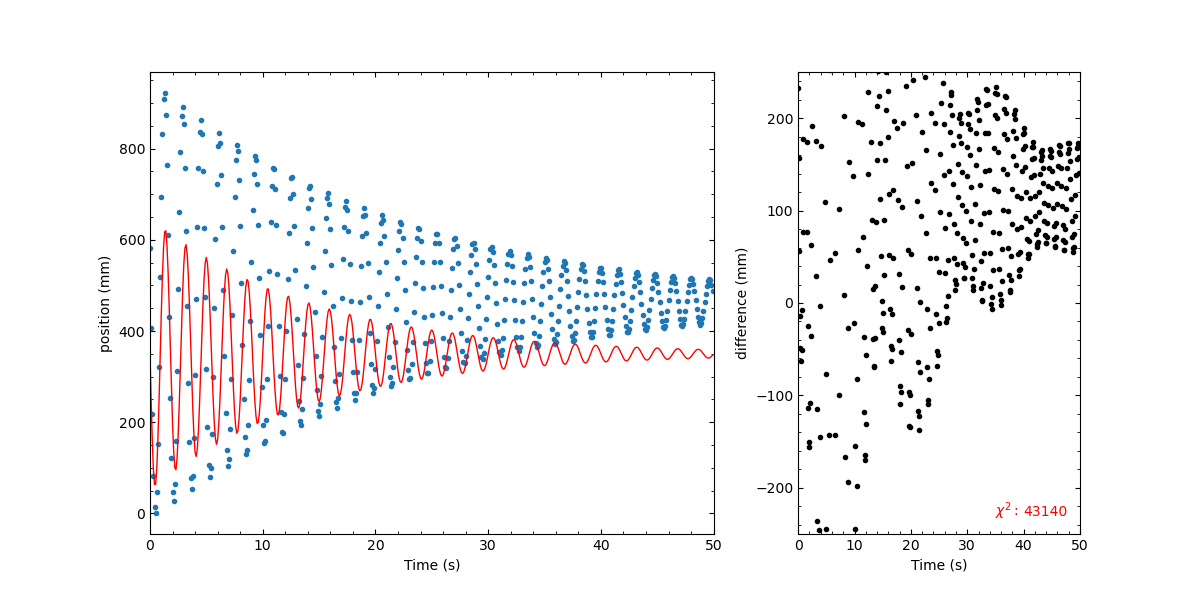

In [5]:
# Create original graph
output=ipyw.Output()

with output:
    fig = plt.figure(figsize=(12,6))
    spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[2,1])

    main = plt.subplot(spec[0])
    residual = plt.subplot(spec[1])
    main.set_xlabel("Time (s)")
    residual.set_xlabel("Time (s)")
    main.set_ylabel("position (mm)")
    residual.set_ylabel("difference (mm)")
    main.xaxis.set_minor_locator(AutoMinorLocator())
    main.yaxis.set_minor_locator(AutoMinorLocator())
    main.tick_params(direction='in',which='both',right=True,top=True)
    residual.xaxis.set_minor_locator(AutoMinorLocator())
    residual.yaxis.set_minor_locator(AutoMinorLocator())
    residual.tick_params(direction='in',which='both',right=True,top=True)

    res, = residual.plot(t, dd-s, '.' , color='black')  #generate plot of initial sine wave
                                                        # note comma after the res
    residual.set_xlim(0, 50)        #set axis values for plot
    residual.set_ylim(-250, 250)        #set axis values for plot
    residual.text(35,-230,r'$\chi^2:$',color='red')
    temp=np.sum(np.power(dd-s,2))/(len(dd)-5)
    chi2val = residual.text(40,-230,"{:.0f}".format(temp),color='red')

    main.plot(t,dd, '.')
    l, = main.plot(t, s, lw=1, color='red') #generate plot of initial sine wave
                                            # note comma afetr the l
    main.set_xlim(0,50)
    fig.canvas.toolbar_visible=False
    fig.canvas.header_visible=False
    fig.canvas.footer_visible=False
    fig.canvas.resizable=False

# funtion to update the sine plot when axis of frequency sliders are changed
def update(freq, amp, gamma, phase, offset ):
    l.set_ydata(amp*np.sin(2*np.pi*freq*t+phase)*np.exp(-gamma*t)+offset)  #update plot
    res.set_ydata(dd-(amp*np.sin(2*np.pi*freq*t+phase)*np.exp(-gamma*t)+offset))  #update plot
    chi2val.set_text("{:.0f}".format(np.sum(np.power(dd-(amp*np.sin(2*np.pi*freq*t+phase)*np.exp(-gamma*t)+offset),2))/(len(dd)-5)))
    fig.canvas.draw()

out = ipyw.interactive_output(update, {"amp":samp, "freq":sfreq, "gamma":sgamma, "phase":sphase, "offset":soffset})
vbox1 = ipyw.widgets.HBox([samp, sfreq, sgamma, sphase, soffset])
vbox2 = ipyw.widgets.VBox([output])
ui = ipyw.widgets.HBox([vbox1,vbox2])
ui
